Plot the magnetisation and susceptibility of different blocks in a three block SBM for different solution branches.

Simulations performed in: fig2-C-J-simulations.py

Created on: 11/02/21

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.cluster import KMeans
import numpy as np

In [2]:
data=pd.read_csv("Data/three_block_sus_data.csv")
data.head()

,Unnamed: 0,beta_factor,init_cond,magnetisation,m1,m2,m3,susB1,susB2,susB3,m_fp_convergence
0,0,0.5000,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.238110,0.563520,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043..."
1,0,0.6875,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.377098,0.000005,-0.377090,0.536492,0.651418,0.536498,"[0.3591510186401927, 0.1631584081902898, 0.077..."
2,0,0.8750,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000009,0.533326,0.000013,-0.533312,0.475229,0.740471,0.475247,"[0.3591510186401927, 0.19759328867795914, 0.11..."
3,0,1.0625,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000014,0.676215,0.000024,-0.676199,0.370935,0.851350,0.370959,"[0.3591510186401927, 0.2258474308421938, 0.142..."
4,0,1.2500,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000021,0.784085,0.000045,-0.784068,0.251844,0.934418,0.251869,"[0.3591510186401927, 0.24841667299982953, 0.16..."


## Plot any relationship between block level susceptibility and magnetisation

In [3]:
all_mags=pd.melt(data.reset_index(),id_vars=['index','beta_factor'],value_vars=['m1','m2','m3'],value_name='m',var_name='block')
all_sus=pd.melt(data.reset_index(),id_vars=['index','beta_factor'],value_vars=['susB1','susB2','susB3'],value_name='sus',var_name='block')
all_mags=all_mags.merge(all_sus,on=['index','beta_factor'])
all_mags
#pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)[source]¶

,index,beta_factor,block_x,m,block_y,sus
0,0,0.5,m1,0.238119,susB1,0.563520
1,0,0.5,m1,0.238119,susB2,0.604059
2,0,0.5,m1,0.238119,susB3,0.563523
3,0,0.5,m2,0.000003,susB1,0.563520
4,0,0.5,m2,0.000003,susB2,0.604059
...,...,...,...,...,...,...
5620,624,5.0,m2,-0.984594,susB2,0.999465
5621,624,5.0,m2,-0.984594,susB3,0.001274
5622,624,5.0,m3,-0.999979,susB1,0.032685
5623,624,5.0,m3,-0.999979,susB2,0.999465


<AxesSubplot:xlabel='m', ylabel='sus'>

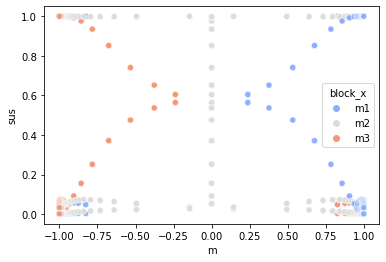

In [4]:
sns.scatterplot(data=all_mags,x='m',y='sus',hue='block_x',palette='coolwarm')

<AxesSubplot:xlabel='ms1', ylabel='sus'>

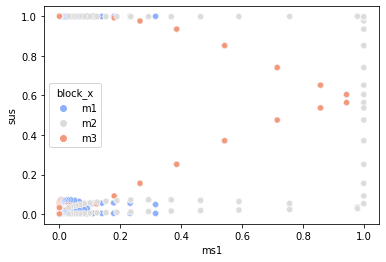

In [5]:
all_mags['ms1']=1.0-all_mags['m']**2
sns.scatterplot(data=all_mags,x='ms1',y='sus',hue='block_x',palette='coolwarm')

## State clustering as a function of $\beta$

We will maintain cluster labels by using the average magnetisation assoiciated with the cluster. This gives some degree of fuzzyness near the bifurcation points. However, it is sufficient for plotting purposes.

In [6]:
beta_factor=3.125
this_beta_data=data.loc[data['beta_factor']==beta_factor]
X=this_beta_data[['m1','m2','m3']].values

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

cluster_means = [ round(np.mean(k),2) for k in kmeans.cluster_centers_ ]
cluster_sort_df=pd.DataFrame({'cluster_mean_mag':cluster_means}).sort_values(by='cluster_mean_mag')
cluster_sort_df['cluster_mag_rank']=np.arange(0,len(cluster_sort_df),1)
cluster_sort_df.head()

,cluster_mean_mag,cluster_mag_rank
1,-0.94,0
2,-0.29,1
0,0.29,2
3,0.94,3


In [7]:

# To do: re-run this cluster after clusters at 2DP has been computed.
# Or combine the mag rank and clusts at 2DP labels to get this?

all_beta_data=pd.DataFrame()
for beta_factor in sorted(list(set(data['beta_factor'].to_list()))) :

    this_beta_data=data.loc[data['beta_factor']==beta_factor]
    X=this_beta_data[['m1','m2','m3']].values

    kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

    cluster_means = [ round(np.mean(k),2) for k in kmeans.cluster_centers_ ]
    cluster_sort_df=pd.DataFrame({'cluster_mean_mag':cluster_means}).sort_values(by='cluster_mean_mag')
    cluster_sort_df['cluster_mag_rank']=np.arange(0,len(cluster_sort_df),1)

    this_beta_data['labels']=kmeans.labels_
    this_beta_data['cluster_mean_mag']=[ round( np.mean(kmeans.cluster_centers_[p]),2) for p in kmeans.labels_]
    # must label by rank of cluster mean mag value?
    this_beta_data = this_beta_data.merge(cluster_sort_df,on='cluster_mean_mag',how='left')
    
    all_beta_data=all_beta_data.append(this_beta_data)

<ipython-input-7-c47227d536de>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_beta_data['labels']=kmeans.labels_
<ipython-input-7-c47227d536de>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_beta_data['cluster_mean_mag']=[ round( np.mean(kmeans.cluster_centers_[p]),2) for p in kmeans.labels_]
<ipython-input-7-c47227d536de>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<ipython-input-7-c47227d536de>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_beta_data['labels']=kmeans.labels_
<ipython-input-7-c47227d536de>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_beta_data['cluster_mean_mag']=[ round( np.mean(kmeans.cluster_centers_[p]),2) for p in kmeans.labels_]
<ipython-input-7-c47227d536de>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<ipython-input-7-c47227d536de>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_beta_data['labels']=kmeans.labels_
<ipython-input-7-c47227d536de>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_beta_data['cluster_mean_mag']=[ round( np.mean(kmeans.cluster_centers_[p]),2) for p in kmeans.labels_]


In [8]:
clust_count_df=all_beta_data.groupby('beta_factor').agg({'cluster_mean_mag':'nunique'}).reset_index().rename(columns={'cluster_mean_mag':'clusts_at_2dp'})
clust_count_df.head()

,beta_factor,clusts_at_2dp
0,0.5000,1
1,0.6875,1
2,0.8750,1
3,1.0625,1
4,1.2500,1


In [9]:
all_beta_data=all_beta_data.merge(clust_count_df,on='beta_factor',how='left')

In [10]:
all_beta_data.head()

,Unnamed: 0,beta_factor,init_cond,magnetisation,m1,m2,m3,susB1,susB2,susB3,m_fp_convergence,labels,cluster_mean_mag,cluster_mag_rank,clusts_at_2dp
0,0,0.5,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043...",0,0.0,0,1
1,0,0.5,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043...",0,0.0,1,1
2,0,0.5,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043...",0,0.0,2,1
3,0,0.5,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043...",0,0.0,3,1
4,0,0.5,"[0.384052666852587, 0.6377274747048265, 0.8168...",0.000003,0.238117,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.6128635516169163, 0.23354477902160176, 0.08...",0,0.0,0,1


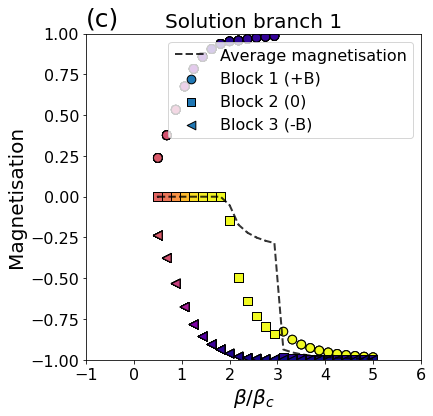

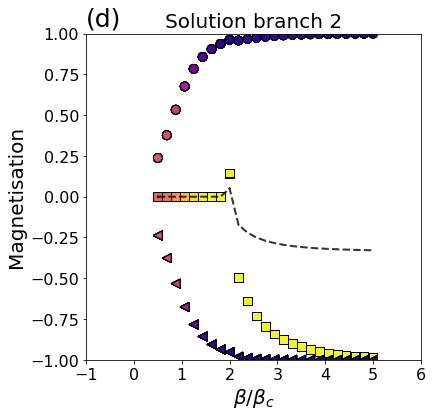

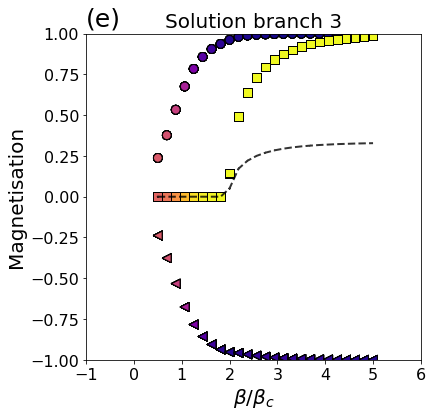

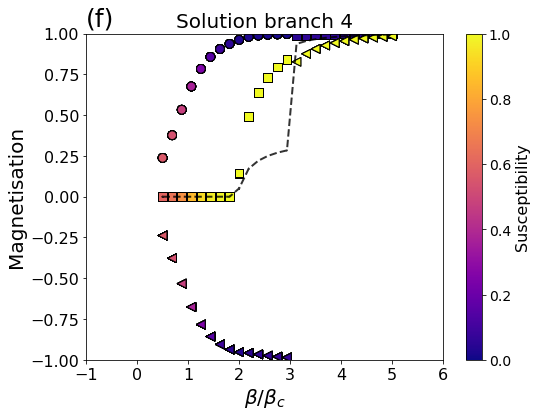

In [11]:
#cluster=1
cluster_to_label_map={0:'(c)',1:'(d)',2:'(e)',3:'(f)'}

for cluster in [0,1,2,3]:
    only_one=all_beta_data.loc[all_beta_data['cluster_mag_rank']==cluster]
    bfs=only_one['beta_factor'].to_list()
    m1=only_one['m1'].to_list()
    m2=only_one['m2'].to_list()
    m3=only_one['m3'].to_list()
    mean_mag=only_one['magnetisation'].to_list()

    sus_1=only_one['susB1'].to_list()
    sus_2=only_one['susB2'].to_list()
    sus_3=only_one['susB3'].to_list()
    all_sus=list(np.concatenate((sus_1,sus_2,sus_3)))

    import matplotlib
    import matplotlib.cm as cm

    #minima = min(all_sus)
    #maxima = max(all_sus)
    # use the same norm for all plots:
    minima=0.0
    maxima=1.0

    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.plasma)

    if cluster==3:
        fig,ax=plt.subplots(figsize=(8,6))
    else :
        fig,ax=plt.subplots(figsize=(6,6))
    
    
    #plt.title("Optimal block to target for a MS is the one with lowest absolute mag")
    plt.title(f"Solution branch {cluster+1}",fontsize=20)

    ax.scatter(bfs,m1,c=sus_1,cmap='plasma',norm=norm,marker='o',label='Block 1 (+B)',linewidths=1.0,edgecolors='k',s=75)
    ax.scatter(bfs,m2,c=sus_2,cmap='plasma',norm=norm,marker='s',label='Block 2 (0)',linewidths=1.0,edgecolors='k',s=75)
    ax.scatter(bfs,m3,c=sus_3,cmap='plasma',norm=norm,marker='<',label='Block 3 (-B)',linewidths=1.0,edgecolors='k',s=75)
    
    plt.plot(bfs,mean_mag,'k--',label='Average magnetisation',lw=2.0,alpha=0.8)

    if cluster == 0 :
        plt.legend(loc='upper right',fontsize=16)
    
    plt.xlim(-1,6)
    plt.ylim(-1,1)

    plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
    plt.ylabel("Magnetisation",fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.text(-1,1.05,cluster_to_label_map[cluster],fontsize=25)

    if cluster == 3 :
        cbar=plt.colorbar(mapper, ax=ax)
        cbar.ax.set_ylabel('Susceptibility', rotation=90,fontsize=16)
        cbar.ax.tick_params(labelsize=14) 
    
    
    plt.savefig(f"Plots/sus_on_block_phase_sol_{cluster+1}" + ".pdf",bbox_inches='tight')

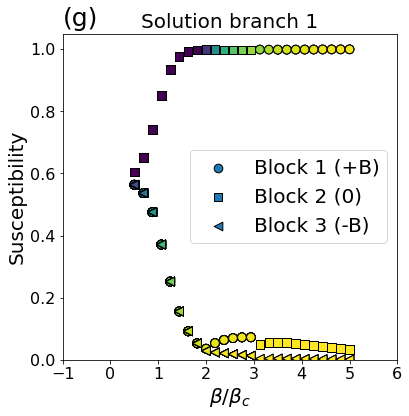

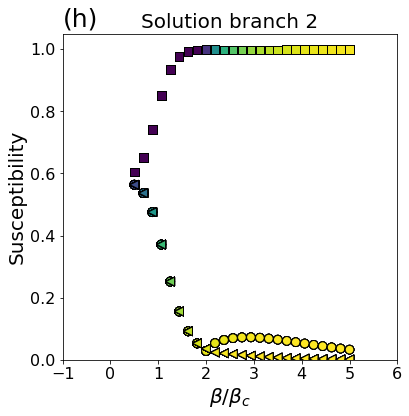

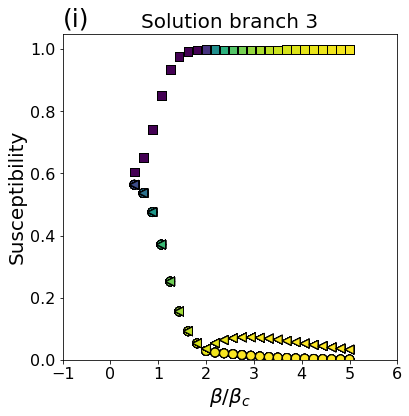

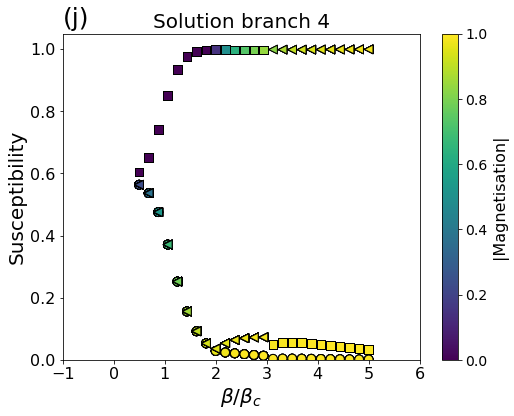

In [12]:

cluster_to_label_map={0:'(g)',1:'(h)',2:'(i)',3:'(j)'}


for cluster in [0,1,2,3]:
    only_one=all_beta_data.loc[all_beta_data['cluster_mag_rank']==cluster]
    bfs=only_one['beta_factor'].to_list()
    m1=[abs(k) for k in only_one['m1'].to_list()]
    m2=[abs(k) for k in only_one['m2'].to_list()]
    m3=[abs(k) for k in only_one['m3'].to_list()]
    mean_mag=only_one['magnetisation'].to_list()

    sus_1=only_one['susB1'].to_list()
    sus_2=only_one['susB2'].to_list()
    sus_3=only_one['susB3'].to_list()
    all_sus=list(np.concatenate((sus_1,sus_2,sus_3)))
    
    
    minima=0.0
    maxima=1.0
    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
    
    if cluster==3:
        fig,ax=plt.subplots(figsize=(8,6))
    else :
        fig,ax=plt.subplots(figsize=(6,6))
    
    #plt.title("Optimal block to target for a MS is the one with lowest absolute mag")
    plt.title(f"Solution branch {cluster+1}",fontsize=20)
    
    #plt.plot(bfs,sus_1,label='block 1 (+VE)')
    #plt.plot(bfs,sus_2,label='block 2 (0 field)')
    #plt.plot(bfs,sus_3,label='block 3 (0 field)')
    
    ax.scatter(bfs,sus_1,c=m1,cmap='viridis',norm=norm,marker='o',label='Block 1 (+B)',linewidths=1.0,edgecolors='k',s=75)
    ax.scatter(bfs,sus_2,c=m2,cmap='viridis',norm=norm,marker='s',label='Block 2 (0)',linewidths=1.0,edgecolors='k',s=75)
    ax.scatter(bfs,sus_3,c=m3,cmap='viridis',norm=norm,marker='<',label='Block 3 (-B)',linewidths=1.0,edgecolors='k',s=75)
    
    
    plt.xlim(-1,6)
    plt.ylim(0,1.05)
    
    plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
    plt.ylabel("Susceptibility",fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.text(-1,1.075,cluster_to_label_map[cluster],fontsize=25)
    
    if cluster==0:
        plt.legend(loc='center right',fontsize=20)
        
    if cluster == 3 :
        cbar=plt.colorbar(mapper, ax=ax)
        cbar.ax.set_ylabel('|Magnetisation|', rotation=90,fontsize=16)
        cbar.ax.tick_params(labelsize=14) 
    
    plt.savefig(f"Plots/block_sus_phase_sol_{cluster+1}" + ".pdf",bbox_inches='tight')
    
    
    #ax.scatter(bfs,m1,c=sus_1,cmap='coolwarm',norm=norm,marker='o',label='block 1 (+VE)')
    #ax.scatter(bfs,m2,c=sus_2,cmap='coolwarm',norm=norm,marker='s',label='block 2 (0 field)')
    #ax.scatter(bfs,m3,c=sus_3,cmap='coolwarm',norm=norm,marker='<',label='block 3 (0 field)')

<AxesSubplot:xlabel='m1', ylabel='susB1'>

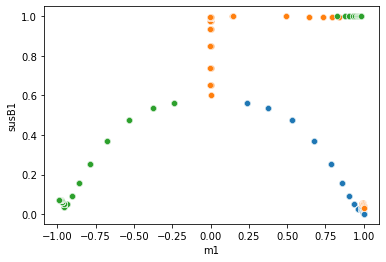

In [13]:
sns.scatterplot(data=only_one,x='m1',y='susB1')
sns.scatterplot(data=only_one,x='m2',y='susB2')
sns.scatterplot(data=only_one,x='m3',y='susB3')